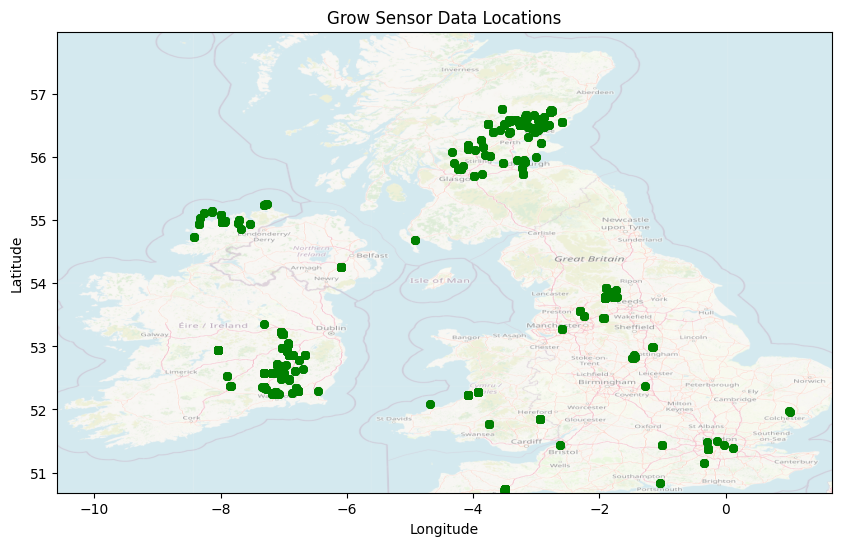

In [2]:
import pandas as pd
import geopandas as gpd #I used the website https://towardsdatascience.com/mapping-with-matplotlib-pandas-geopandas-and-basemap-in-python-d11b57ab5dac for ideas to use geopandas
import matplotlib.pyplot as plt
from shapely.geometry import Point

def read_grow_locations(grow_file_path): #defining the function read_grow_locations with the grow_file_path, which is linked later
    #Reading the csv file into a dataframe
    df = pd.read_csv(grow_file_path)

    #Creating a GeoDataFrame from the dataframe
    geometry = [Point(xy) for xy in zip(df['Latitude'], df['Longitude'])] #Uses shapely points to visualise the data for the geo dataframe
    geo_df = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326') #crs= corresponds to the coordinate reference system and defines the spatial reference for the coordinates

    return geo_df

def plot_sensor_locations(sensor_locations, map_image_path):
    #Using the geopandas library to plot the map and size of figures
    fig, ax = plt.subplots(figsize=(10, 10))

    #Plotting the sensor locations on the map and adjusting their attributes
    sensor_locations.plot(ax=ax, markersize=30, color='green', alpha=0.6)

    #Loads the map using the map image path and alters the boundaries for the map
    map_img = plt.imread(map_image_path)
    ax.imshow(map_img, extent=[-10.592, 1.6848, 50.681, 57.985], transform=ax.transData, alpha=0.5)

    plt.title('Grow Sensor Data Locations') #Title of the plot
    plt.xlabel('Longitude') #x axis label
    plt.ylabel('Latitude') #y axis label

    #Displays the plot
    plt.show()

#Links to the dataset and map png file, replace with own filepath
grow_file_path = r'\Users\CCumm\OneDrive\Documents\AC50002\2nd Python Assignment\GrowLocations.csv'
map_image_path = r'\Users\CCumm\OneDrive\Documents\AC50002\2nd Python Assignment\map7.png'

#Reads the sensor locations
sensor_locations = read_grow_locations(grow_file_path)

#Plots the sensor locations and displays map
plot_sensor_locations(sensor_locations, map_image_path)